## GADGET

In [6]:
import numpy as np
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

path = '/mnt/sersic2/omarioni/CLUES-GADGET2/'
data = np.loadtxt(path +  'redshift_outputs.txt')

snap = data[:,0]
z    = data[:,1]
a    = data[:,2]

time = tiempo.conv(z, h, omega_lambda, omega_matter)

for i in range(len(snap)):
    print(snap[i],z[i],a[i],time[i])

(0.0, 41.0, 0.02381, 0.06701771081878587)
(1.0, 30.5, 0.03175, 0.10317956012654476)
(2.0, 24.2, 0.03969, 0.14419561744336012)
(3.0, 21.48, 0.04448, 0.17114052477261502)
(4.0, 19.35, 0.04914, 0.19869824859661145)
(5.0, 17.59, 0.0538, 0.2275692260732569)
(6.0, 16.11, 0.05846, 0.25771995174833323)
(7.0, 14.84, 0.06312, 0.2893203577774044)
(8.0, 13.91, 0.06709, 0.316799443750549)
(9.0, 13.08, 0.071, 0.3452109815612548)
(10.0, 12.35, 0.07491, 0.3738980552571446)
(11.0, 11.69, 0.07882, 0.40342951822227047)
(12.0, 11.09, 0.08273, 0.43381446653188094)
(13.0, 10.59, 0.08627, 0.4621699739098297)
(14.0, 10.14, 0.08976, 0.4904350510360021)
(15.0, 9.724, 0.09325, 0.5192243926770825)
(16.0, 9.336, 0.09675, 0.548707594856662)
(17.0, 8.98, 0.1002, 0.5782985734971253)
(18.0, 8.662, 0.1035, 0.6070509116954048)
(19.0, 8.372, 0.1067, 0.6354102621794183)
(20.0, 8.099, 0.1099, 0.66418294122162)
(21.0, 7.842, 0.1131, 0.6933086488627789)
(22.0, 7.598, 0.1163, 0.7229841310025211)
(23.0, 7.375, 0.1194, 0.752003

r200 = 142.2386655737705
rgal = 21.335799836065576
r50 = 1.4897285
Vmax,halo =  126.70706
rmax,halo =  131.43344


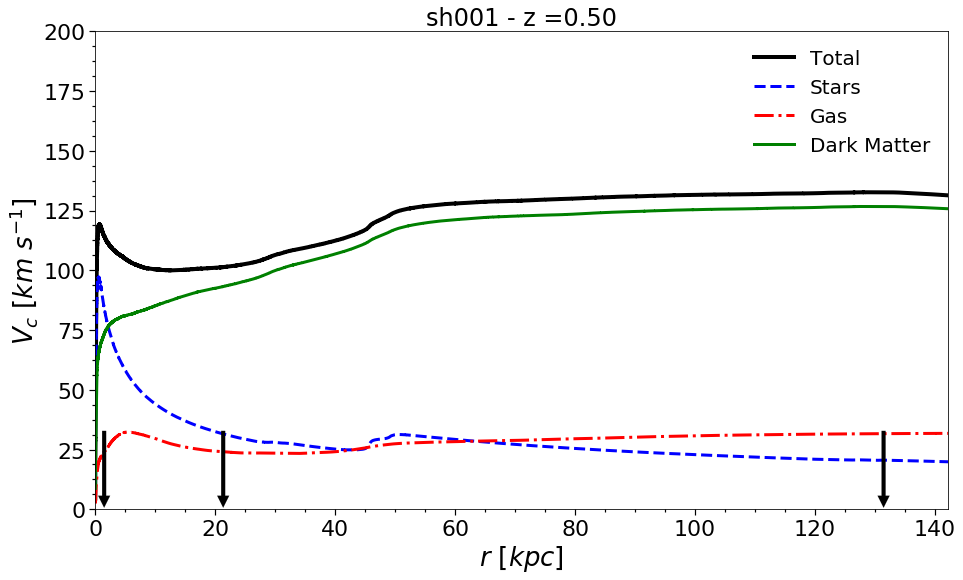

In [20]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np


h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

path = '/mnt/sersic2/omarioni/CLUES-GADGET2'

aexp = 0.6663

snap = h5py.File(path + '/snap_309.h5py', 'r')
    
cm   = snap['subhalo_001/Center'][()]
r200 = snap['subhalo_001/R200'][()]

pstr = snap['subhalo_001/Str/Coordinates'][()]
mstr = snap['subhalo_001/Str/Masses'][()]
vel  = snap['subhalo_001/Str/Velocities'][()]

pgas = snap['subhalo_001/Gas/Coordinates'][()]
mgas = snap['subhalo_001/Gas/Masses'][()]

pdrk = snap['subhalo_001/Drk/Coordinates'][()]
mdrk = snap['subhalo_001/Drk/Masses'][()]

z = a0/aexp - 1.
Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = (pstr[:,0]-cm[0])*aexp/h
ystr = (pstr[:,1]-cm[1])*aexp/h
zstr = (pstr[:,2]-cm[2])*aexp/h
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

xgas = (pgas[:,0]-cm[0])*aexp/h
ygas = (pgas[:,1]-cm[1])*aexp/h
zgas = (pgas[:,2]-cm[2])*aexp/h
rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

xdrk = (pdrk[:,0]-cm[0])*aexp/h
ydrk = (pdrk[:,1]-cm[1])*aexp/h
zdrk = (pdrk[:,2]-cm[2])*aexp/h
rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.
#----------------------masas----------------------------
mstr = mstr*1e10/h
mgas = mgas*1e10/h
mdrk = mdrk*1e10/h

r200 = r200*aexp/h

print 'r200 =', r200
rgal=0.15*r200
print 'rgal =', rgal


limit    = np.where(rstr<rgal)
r_sort   = np.sort(rstr[limit])
r_indice = np.argsort(rstr[limit])

limit_str   = np.where(rstr<r200)
rstr_sort   = np.sort(rstr[limit_str])
rstr_indice = np.argsort(rstr[limit_str])

limit_gas   = np.where(rgas<r200)
rgas_sort   = np.sort(rgas[limit_gas])
rgas_indice = np.argsort(rgas[limit_gas])

limit_drk   = np.where(rdrk<r200)
rdrk_sort   = np.sort(rdrk[limit_drk])
rdrk_indice = np.argsort(rdrk[limit_drk])


Mgal_str = np.cumsum((mstr[limit])[r_indice])

Mc_str = np.cumsum((mstr[limit_str])[rstr_indice])

Mc_gas = np.cumsum((mgas[limit_gas])[rgas_indice])

Mc_drk = np.cumsum((mdrk[limit_drk])[rdrk_indice])

#------------------ calculamos r90, r50------------------------------------------
M_gal = Mgal_str[-1]

razon       = Mgal_str/M_gal
cincuenta,  = np.where(razon < 0.50)

r50 = r_sort[cincuenta][-1]
print 'r50 =', r50

#--------------------------------------------------------------       
rtot = np.concatenate([rstr, rgas, rdrk])
mtot = np.concatenate([mstr, mgas, mdrk])

limit_tot   = np.where(rtot<r200)
rtot_sort   = np.sort(rtot[limit_tot])
rtot_indice = np.argsort(rtot[limit_tot])

Mc_tot = np.cumsum((mtot[limit_tot])[rtot_indice])

#print 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
#--------------------------------------------------------------

Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
Vstr = np.sqrt((G*Mc_str)/rstr_sort)
Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)

maximum = np.argmax(Vdrk)
print 'Vmax,halo = ', Vdrk[maximum] 
print 'rmax,halo = ', rdrk_sort[maximum] 



fig=plt.figure(i,figsize=(15,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
total,= ax.plot(rtot_sort,Vtot,'k', lw=4, label= 'Total')
stars,= ax.plot(rstr_sort,Vstr,'--',lw=3, color='b', label ='Stars')
gas,= ax.plot(rgas_sort,Vgas,'-.', color ='r',lw=3, label='Gas')
drk,= ax.plot(rdrk_sort,Vdrk,'-',color='g', lw=3, label='Dark Matter')
ax.set_title('sh001 - z ='+str('%.2f'%z), fontsize= 24)
plt.legend(handles=[total,stars,gas,drk],fontsize=20, frameon=False)
plt.xlabel(u'$r$ $[kpc]$', fontsize=26)
plt.ylabel(u'$V_c$ $[km$ $s^{-1}]$', fontsize=26)
plt.ylim(0,200)
plt.xlim(0,r200)
ax.minorticks_on()
ax.tick_params( labelsize=22)
ax.tick_params('both', length=3, width=1.2,which='minor')
ax.tick_params('both', length=6, width=1.2,which='major')
plt.annotate('', xy=(r50,0), xytext=(0, +80), textcoords='offset points', 
             fontsize=22,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
plt.annotate('', xy=(rgal,0), xytext=(0, +80), textcoords='offset points', 
             fontsize=22,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="right")
plt.annotate('', xy=(rdrk_sort[maximum],0), xytext=(0, +80), textcoords='offset points', 
             fontsize=22,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="right")
plt.show()


In [23]:
import numpy as np
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

path = '/mnt/sersic2/omarioni/Gasoline/'

snapshot = np.loadtxt(path + 'snapshots.txt', dtype='string')


for j in range(len(snapshot)-1,0,-1):
    snap = h5py.File(path + 'outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')

    time = snap['subhalo_001/Time'][()]
    aexp = snap['subhalo_001/aexp'][()]

    z = 1./aexp - 1.
    print(snapshot[j], z, aexp, time )

('1024', -1.4029222228373328e-11, 1.0000000000140292, 13.729565519987414)
('1008', 0.016171884481523513, 0.9840854832450174, 13.515321632086817)
('0992', 0.032705128869193745, 0.9683306222125518, 13.30107774418595)
('0976', 0.04961386947681645, 0.9527313129907985, 13.086833856285102)
('0960', 0.06691311972049352, 0.9372834409065818, 12.872589968384355)
('0944', 0.08461884088289384, 0.9219828775848915, 12.65834608048369)
('0928', 0.10274801981184045, 0.9068254778372923, 12.444102192583028)
('0912', 0.12131875434421957, 0.891807076378411, 12.22985830468233)
('0896', 0.14035034736977825, 0.8769234843541752, 12.015614416783436)
('0880', 0.15986341057736397, 0.8621704856628021, 11.801370528883313)
('0864', 0.17987997907026165, 0.8475438330498616, 11.587126640982719)
('0848', 0.20042363821308218, 0.8330392439527204, 11.372882753082049)
('0832', 0.22151966426818936, 0.818652396070184, 11.158638865181278)
('0816', 0.2431951806147885, 0.804378922628607, 10.944394977280524)
('0800', 0.2654793316

r200= 127.52480105210266
rgal= 19.128720157815398
r50= 2.3293917
Vmax,halo =  113.923546
rmax,halo =  53.289238


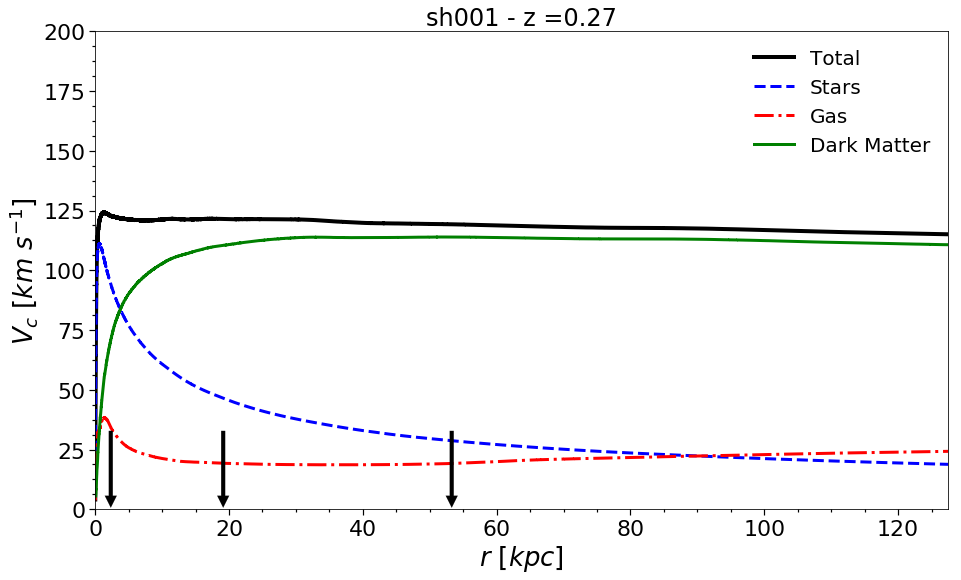

In [25]:
#Graficamos la veloc circular pero con la flecha de V200 y solo para los 3 halos mas grandes
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,4)
vector2 = ('M31', 'MW', 'M33')
G = 4.299e-6
a0 =1.

path = '/mnt/sersic2/omarioni/'

snap = h5py.File(path+'Gasoline/outputs2/snap_0800.h5py', 'r')

cm   = snap['subhalo_002/Center'][()]
r200 = snap['subhalo_002/R200'][()]
aexp = snap['subhalo_002/aexp'][()]
h    = snap['subhalo_002/h'][()]

omega_lambda = snap['subhalo_002/OmegaL0'][()]
omega_matter = snap['subhalo_002/OmegaM0'][()]

pstr = snap['subhalo_002/Str/Coordinates'][()]
mstr = snap['subhalo_002/Str/Masses'][()]
vel  = snap['subhalo_002/Str/Velocities'][()]

pgas = snap['subhalo_002/Gas/Coordinates'][()]
mgas = snap['subhalo_002/Gas/Masses'][()]

pdrk = snap['subhalo_002/Drk/Coordinates'][()]
mdrk = snap['subhalo_002/Drk/Masses'][()]

H0 = h*100
z = a0/aexp - 1.
omega0 = omega_lambda + omega_matter
Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = (pstr[:,0]-cm[0]) #*aexp
ystr = (pstr[:,1]-cm[1])
zstr = (pstr[:,2]-cm[2])
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

xgas = (pgas[:,0]-cm[0])
ygas = (pgas[:,1]-cm[1])
zgas = (pgas[:,2]-cm[2])
rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

xdrk = (pdrk[:,0]-cm[0])
ydrk = (pdrk[:,1]-cm[1])
zdrk = (pdrk[:,2]-cm[2])
rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

#v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
#v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
#v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.

v_x = vel[:,0] 
v_y = vel[:,1] 
v_z = vel[:,2]

#------------------------------------------------
r200 = r200*aexp

print 'r200=', r200
rgal=0.15*r200
print 'rgal=', rgal


limit    = np.where(rstr<rgal)
r_sort   = np.sort(rstr[limit])
r_indice = np.argsort(rstr[limit])

limit_str   = np.where(rstr<r200)
rstr_sort   = np.sort(rstr[limit_str])
rstr_indice = np.argsort(rstr[limit_str])

limit_gas   = np.where(rgas<r200)
rgas_sort   = np.sort(rgas[limit_gas])
rgas_indice = np.argsort(rgas[limit_gas])

limit_drk   = np.where(rdrk<r200)
rdrk_sort   = np.sort(rdrk[limit_drk])
rdrk_indice = np.argsort(rdrk[limit_drk])


Mgal_str = np.cumsum((mstr[limit])[r_indice])

Mc_str = np.cumsum((mstr[limit_str])[rstr_indice])

Mc_gas = np.cumsum((mgas[limit_gas])[rgas_indice])

Mc_drk = np.cumsum((mdrk[limit_drk])[rdrk_indice])

#------------------ calculamos r90, r50------------------------------------------
M_gal = Mgal_str[-1]

razon       = Mgal_str/M_gal
cincuenta,    = np.where(razon < 0.50)

r50 = r_sort[cincuenta][-1]
print 'r50=', r50

#--------------------------------------------------------------       
rtot= np.concatenate([rstr, rgas, rdrk])
mtot= np.concatenate([mstr, mgas, mdrk])

limit_tot = np.where(rtot<r200)
rtot_sort = np.sort(rtot[limit_tot])
rtot_indice = np.argsort(rtot[limit_tot])

Mc_tot = np.cumsum((mtot[limit_tot])[rtot_indice])

#--------------------------------------------------------------
Mc_tot = Mc_tot[1:]
Mc_str = Mc_str[1:]
Mc_gas = Mc_gas[1:]
Mc_drk = Mc_drk[1:]

rtot_sort = rtot_sort[1:]
rstr_sort = rstr_sort[1:]
rgas_sort = rgas_sort[1:]
rdrk_sort = rdrk_sort[1:]

Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
Vstr = np.sqrt((G*Mc_str)/rstr_sort)
Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)

maximum = np.argmax(Vdrk)
print 'Vmax,halo = ', Vdrk[maximum] 
print 'rmax,halo = ', rdrk_sort[maximum] 



fig=plt.figure(i,figsize=(15,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
total,= ax.plot(rtot_sort,Vtot,'k', lw=4, label= 'Total')
stars,= ax.plot(rstr_sort,Vstr,'--',lw=3, color='b', label ='Stars')
gas,= ax.plot(rgas_sort,Vgas,'-.', color ='r',lw=3, label='Gas')
drk,= ax.plot(rdrk_sort,Vdrk,'-',color='g', lw=3, label='Dark Matter')
ax.set_title('sh001 - z ='+str('%.2f'%z), fontsize= 24)
plt.legend(handles=[total,stars,gas,drk],fontsize=20, frameon=False)
plt.xlabel(u'$r$ $[kpc]$', fontsize=26)
plt.ylabel(u'$V_c$ $[km$ $s^{-1}]$', fontsize=26)
plt.ylim(0,200)
plt.xlim(0,r200)
ax.minorticks_on()
ax.tick_params( labelsize=22)
ax.tick_params('both', length=3, width=1.2,which='minor')
ax.tick_params('both', length=6, width=1.2,which='major')
plt.annotate('', xy=(r50,0), xytext=(0, +80), textcoords='offset points', 
             fontsize=22,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1))
plt.annotate('', xy=(rgal,0), xytext=(0, +80), textcoords='offset points', 
             fontsize=22,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="right")
plt.annotate('', xy=(rdrk_sort[maximum],0), xytext=(0, +80), textcoords='offset points', 
             fontsize=22,arrowprops=dict(facecolor='black', shrink=0.02, lw=0.1),ha="right")
plt.show()
